In [1]:
import os
import re
import io
import wget
import numpy as np
import uuid

# Define how to get data
def get_iris(storage_folder="temp", data_file="iris_data.txt", splitter=',', dt = np.float32):
    data_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
    # Make a storage folder for models and data
    if not os.path.exists(storage_folder):
        os.makedirs(storage_folder)
        
    data_path = os.path.join(storage_folder, data_file)
    
    if not os.path.isfile(os.path.join(storage_folder, data_file)):        
        _ = wget.download(data_url, data_path) 

    data = [l.strip() for l in open(data_path) if l.strip()]
    features = [tuple(map(float, x.split(splitter)[:-1])) for x in data]
    labels = [x.split(splitter)[-1] for x in data]
    
    return np.array(features, dtype = dt), labels

def get_satellite(storage_folder="temp", data_file="satellite_data.txt", splitter=' ', dt = np.float32):
    data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/satimage/sat.trn'
    # data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/satimage/sat.tst'
    # Make a storage folder for models and data
    if not os.path.exists(storage_folder):
        os.makedirs(storage_folder)
        
    data_path = os.path.join(storage_folder, data_file)
    
    if not os.path.isfile(os.path.join(storage_folder, data_file)):           
        _ = wget.download(data_url, data_path) 

    data = [l.strip() for l in open(data_path) if l.strip()]
    features = [tuple(map(float, x.split(splitter)[:-1])) for x in data]
    labels = [x.split(splitter)[-1] for x in data]
    
    return np.array(features, dtype = dt), labels

def get_banknote(storage_folder="temp", data_file="banknote_data.txt", splitter=',', dt = np.float32):
    data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt'
    # Make a storage folder for models and data
    if not os.path.exists(storage_folder):
        os.makedirs(storage_folder)
        
    data_path = os.path.join(storage_folder, data_file)
    
    if not os.path.isfile(os.path.join(storage_folder, data_file)):           
        _ = wget.download(data_url, data_path) 

    data = [l.strip() for l in open(data_path) if l.strip()]
    features = [tuple(map(float, x.split(splitter)[:-1])) for x in data]
    labels = [x.split(splitter)[-1] for x in data]
    
    return np.array(features, dtype = dt), labels

def get_seeds(storage_folder="temp", data_file="seeds_data.txt", splitter='\t', dt = np.float32):
    data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt'
    # Make a storage folder for models and data
    if not os.path.exists(storage_folder):
        os.makedirs(storage_folder)
        
    data_path = os.path.join(storage_folder, data_file)
    
    if not os.path.isfile(os.path.join(storage_folder, data_file)):           
        _ = wget.download(data_url, data_path) 

    data = [l.strip() for l in open(data_path) if l.strip()]
    features = [tuple(map(float, x.replace("\t\t", "\t").split(splitter)[:-1])) for x in data]
    labels = [x.split(splitter)[-1] for x in data]
    
    return np.array(features, dtype = dt), labels


def get_libras(storage_folder="temp", data_file="libras_data.txt", splitter=',', dt = np.float32):
    data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/libras/movement_libras.data'
    # Make a storage folder for models and data
    if not os.path.exists(storage_folder):
        os.makedirs(storage_folder)
        
    data_path = os.path.join(storage_folder, data_file)
    
    if not os.path.isfile(os.path.join(storage_folder, data_file)):           
        _ = wget.download(data_url, data_path) 

    data = [l.strip() for l in open(data_path) if l.strip()]
    features = [tuple(map(float, x.split(splitter)[:-1])) for x in data]
    labels = [x.split(splitter)[-1] for x in data]
    
    return np.array(features, dtype = dt), labels

vector_values, labels = get_iris()

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.mlab import PCA as mlabPCA
import math

mlab_pca = mlabPCA(vector_values)
users_2d = mlab_pca.project(vector_values, minfrac=mlab_pca.fracs[1])

def drawClusters(assignment_values):
    f = plt.clf()
    data = {"x": [], "y": [], "cluster": []}
    for i in range(len(assignment_values)):
        data["x"].append(users_2d[i][0])
        data["y"].append(users_2d[i][1])
        data["cluster"].append(assignment_values[i])
    df = pd.DataFrame(data)
    sns.lmplot("x", "y", data=df, 
               fit_reg=False, size=7, 
               hue="cluster", legend=False)
    plt.show()

def drawPoints():
    plt.clf()
    data = {"x": [], "y": []}
    for i in range(len(users_2d)):
        data["x"].append(users_2d[i][0])
        data["y"].append(users_2d[i][1])
    df = pd.DataFrame(data)
    sns.lmplot("x", "y", data=df, 
               fit_reg=False, legend=False)
    plt.show()

In [3]:
num_clusters = len(set(labels))

shape_vectors = np.shape(vector_values)
num_vectors = shape_vectors[0]
dims_vectors = shape_vectors[1]

print("Labels: ")
print(set(labels))
print("Sample size: ")
print(num_vectors)
print("Dimensions: ")
print(dims_vectors)
print("Clusters/K: ")
print(num_clusters)

def getIndexedLabels(labels):
    labels_unique = np.unique(labels)
    labels_indexed = []
    for label in labels:
        labels_indexed.append(np.where(labels_unique==label))
    labels_indexed = np.squeeze(labels_indexed)
    return labels_indexed

labels_indexed = getIndexedLabels(labels)
    
# drawClusters(labels_indexed)

Labels: 
{'Iris-setosa', 'Iris-virginica', 'Iris-versicolor'}
Sample size: 
150
Dimensions: 
4
Clusters/K: 
3


In [4]:
import tensorflow as tf
print(tf.__version__)

sess_config = tf.ConfigProto(log_device_placement=False, allow_soft_placement=True)
sess_config.gpu_options.allow_growth = True
sess_config.gpu_options.per_process_gpu_memory_fraction = 0.95

init_op = tf.global_variables_initializer()
dt = tf.float32
mass_t = 1500

1.2.1


In [5]:
def initialize_clusters(vector_values, num_clusters):
    X = vector_values
    n = np.shape(X)[0]
    d = np.shape(X)[1]
    K = num_clusters
    S = np.ones(K)*(int(n/K))
    S[K-1] = S[K-1] + n%K
    
    Y = np.zeros([n, 1])
    for i in range(K):
        yis0 = np.where(Y==0)[0]
        a = np.take(X, yis0, axis=0)
        b = np.random.randn(d, 1)
        xt = np.squeeze(np.dot(a, b))
        inx = np.argsort(xt)
        Y[yis0[inx[range(int(S[i]))]]]=i
    return np.squeeze(Y)

def Projections(D, t = mass_t): #np only
    dims = np.shape(D)[1]
    directions_td = np.random.uniform(size = (t, dims), low = -1, high = 1)
    projectors_td = np.divide(directions_td, np.linalg.norm(directions_td, axis=1, keepdims=True))

    projections_tn = np.squeeze(np.matmul(
        np.expand_dims(np.expand_dims(vector_values, 0), 2)    #1, n, 1, d
        , np.expand_dims(np.expand_dims(projectors_td, 1), 3)  #t, 1, d, 1
    ) , [2, 3]) # tf.matmul does not broadcast. It brings OOM if they are tiled first.
    return projectors_td, projections_tn

In [6]:
def pdist2(a, b, normalizer_a = None, normalizer_b = None, ord = 2, size_limit = 500000000):
    n_a = tf.shape(a)[0]
    n_b = tf.shape(b)[0]
    
    dims = tf.shape(a)[1] # whatever
    
    batch_size = tf.cast(tf.divide(size_limit, (n_a * n_b)), dtype = tf.int32)
    
    batch_size = tf.cond(batch_size > 0, lambda: batch_size, lambda: tf.constant(1, dtype = tf.int32))
    
    pdist_sum = tf.zeros([n_a, n_b], dtype = dt)
    batch_index = tf.constant(0, dtype = tf.int32)
    
    def loopbody_pdist2(batch_index, pdist_sum):
        cur_batch_size = tf.cond(
            (batch_index + 1) * batch_size <= dims,
            lambda: batch_size,
            lambda: dims - batch_index * batch_size
        )
        batch_selector = tf.range(cur_batch_size, dtype = tf.int32) + (batch_index * batch_size)
        
        pdist_sum_batch = tf.abs(
            # [batch_size, n_a, 1] - [batch_size, 1, n_b]
            tf.expand_dims(tf.gather(tf.transpose(a), batch_selector), 2) - \
            tf.expand_dims(tf.gather(tf.transpose(b), batch_selector), 1) 
        )
                
        if normalizer_a is not None and normalizer_b is not None:
            pdist_sum_batch = tf.pow(pdist_sum_batch, 2) \
            / tf.expand_dims(tf.gather(tf.transpose(normalizer_a), batch_selector), 2) \
            / tf.expand_dims(tf.gather(tf.transpose(normalizer_b), batch_selector), 1)
            pdist_sum_batch = tf.sqrt(pdist_sum_batch)
        elif normalizer_a is not None:
            pdist_sum_batch = pdist_sum_batch \
            / tf.expand_dims(tf.gather(tf.transpose(normalizer_a), batch_selector), 2)
        elif normalizer_b is not None:
            pdist_sum_batch = pdist_sum_batch \
            / tf.expand_dims(tf.gather(tf.transpose(normalizer_b), batch_selector), 1)
        
        pdist_sum_batch = tf.reduce_sum(tf.pow(pdist_sum_batch, ord), axis = 0)
        
        return [
            batch_index + 1,
            pdist_sum + pdist_sum_batch
        ]
    
    _, pdist_sum = tf.while_loop(
        lambda batch_index, pdist_sum: batch_index * batch_size < dims,
        loopbody_pdist2,
        loop_vars = [batch_index, pdist_sum],
        shape_invariants = [batch_index.get_shape(), tf.TensorShape(None)],
        parallel_iterations = 1
    )
    
    pdist = tf.pow(pdist_sum, tf.cast(1.0 / ord, dtype = dt))
    return pdist
    
#     batch_selector = tf.range(dims, dtype = tf.int32) + (0 * batch_size)
#     return batch_selector

In [7]:
%%time

def loop_kmeans(K, assignments, constants):
    D = constants[0]
    clusters = [
        tf.gather(D, tf.squeeze(tf.where(tf.equal(assignments, c)), squeeze_dims=[1])) 
        for c in range(K)
    ]
    
    centroids = tf.concat([
        tf.expand_dims(tf.reduce_mean(cluster, 0), 0)
        for cluster in clusters
    ], 0) # [K]
    
    result = tf.argmin(pdist2(D, centroids), 1)
    return result

def loop_kmedoids(K, assignments, constants):
    D = constants[0]
    clusters = [
        tf.gather(D, tf.squeeze(tf.where(tf.equal(assignments, c)), squeeze_dims=[1])) 
        for c in range(K)
    ]
    
    pdist_cc = [
        pdist2(clusters[c], clusters[c])
        for c in range(K)
    ]
    
    medoids = tf.concat([
        tf.expand_dims(clusters[c][tf.argmin(tf.reduce_sum(pdist_cc[c], axis = 1))], axis = 0)
        for c in range(K)
    ], 0)
    
    result = tf.argmin(pdist2(D, medoids), 1)
    return result

def loop_kmass_5(K, assignments, constants):
    projections = constants[0]
    
    selectors_c = [tf.squeeze(tf.where(tf.equal(assignments, c)), squeeze_dims=[1]) for c in range(K)]
    
    clusters = [
        tf.gather(projections, selectors_c[c])
        for c in range(K)
    ]
    
    normalizers = [
        tf.reduce_max(clusters[c], 0, keep_dims = True) - \
        tf.reduce_min(clusters[c], 0, keep_dims = True) # [1, t]
        for c in range(K)
    ]
    
#     normalizers_g = tf.gather(tf.concat(normalizers, axis = 0), assignments) # [n, t]
    
    pdist_c = [
        pdist2(
            projections, clusters[c],
#             normalizer_a = normalizers_g,
            normalizer_b = normalizers[c], 
            ord = 1)
        for c in range(K)
    ]
    
    kmeans = tf.concat([
        tf.reduce_sum(pdist_c[c], axis = 1, keep_dims = True)/tf.cast(tf.shape(pdist_c[c])[1], dtype = dt)
        for c in range(K)
    ], 1)
    
    result = tf.argmin(kmeans, 1)
    return result

def loop_kfive_mass(K, assignments, constants):
    projections = constants[0]
    
    selectors_c = [tf.squeeze(tf.where(tf.equal(assignments, c)), squeeze_dims=[1]) for c in range(K)]
    
    clusters = [
        tf.gather(projections, selectors_c[c])
        for c in range(K)
    ]
    
    normalizers = [
        tf.reduce_max(clusters[c], 0, keep_dims = True) - \
        tf.reduce_min(clusters[c], 0, keep_dims = True) # [1, t]
        for c in range(K)
    ]
    
    normalizers_g = tf.gather(tf.concat(normalizers, axis = 0), assignments) # [n, t]
    
    pdist_c = [
        pdist2(
            projections, clusters[c],
            normalizer_a = normalizers_g,
            normalizer_b = normalizers[c], 
            ord = 1)
        for c in range(K)
    ]
    
    kmeans = tf.concat([
        tf.reduce_sum(pdist_c[c], axis = 1, keep_dims = True)/tf.cast(tf.shape(pdist_c[c])[1], dtype = dt)
        for c in range(K)
    ], 1)
    
    result = tf.argmin(kmeans, 1)
    return result

def loop_kfive_lloyd(K, assignments, constants):
    projections = constants[0] # [n, t]
    
    selectors_c = [tf.squeeze(tf.where(tf.equal(assignments, c)), squeeze_dims=[1]) for c in range(K)]
    
    clusters = [
        tf.gather(projections, selectors_c[c])
        for c in range(K)
    ]
    
    centroids = [
        tf.reduce_mean(clusters[c], 0, keep_dims = True) # [1, t]
        for c in range(K)
    ]
    
    normalizers = [
        tf.reduce_max(clusters[c], 0, keep_dims = True) - \
        tf.reduce_min(clusters[c], 0, keep_dims = True) # [1, t]
        for c in range(K)
    ]
    
    normalizers_g = tf.gather(tf.concat(normalizers, axis = 0), assignments) # [n, t]
    
    pdist5_c = tf.concat([
        pdist2(
            projections, centroids[c], 
            normalizer_a = normalizers_g,
            normalizer_b = normalizers[c], 
            ord = 1) # [n, 1]
        for c in range(K)
    ], axis = 1)
    result = tf.argmin(pdist5_c, 1)
    return result


def loop_kfive_medoids(K, assignments, constants):
    projections = constants[0] # [n, t]
    
    selectors_c = [tf.squeeze(tf.where(tf.equal(assignments, c)), squeeze_dims=[1]) for c in range(K)]
    
    clusters = [
        tf.gather(projections, selectors_c[c])
        for c in range(K)
    ]
    
    normalizers = [
        tf.reduce_max(clusters[c], 0, keep_dims = True) - \
        tf.reduce_min(clusters[c], 0, keep_dims = True) # [1, t]
        for c in range(K)
    ]
    
    pdist_cc = [
        pdist2(
            clusters[c], clusters[c], 
            normalizer_b = normalizers[c], 
            ord = 1)
        for c in range(K)
    ]
    
    medoids = [
        tf.expand_dims(clusters[c][tf.argmin(tf.reduce_sum(pdist_cc[c], axis = 1))], axis = 0)
        for c in range(K)
    ]
        
    normalizers_g = tf.gather(tf.concat(normalizers, axis = 0), assignments) # [n, t]
    
    pdist5_c = tf.concat([
        pdist2(
            projections, medoids[c], 
            normalizer_a = normalizers_g,
            normalizer_b = normalizers[c], 
            ord = 2) # [n, 1]
        for c in range(K)
    ], axis = 1)
    result = tf.argmin(pdist5_c, 1)
    return result

# _, projections_tn = Projections(vector_values, t = mass_t)

# with tf.Session(config=sess_config) as sess:
#     sess.run(init_op)
#     r = initialize_clusters(vector_values, num_clusters)
#     r = sess.run(loop_kmedoids(
#         num_clusters, 
#         tf.constant(r, dtype = tf.int32), 
# #         [tf.transpose(tf.constant(projections_tn, dtype = dt))]
#         [tf.constant(vector_values, dtype = dt)]
#     ))
# #     print(r.shape)
#     print(r.shape)

Wall time: 0 ns


In [8]:
%%time

# _, projections_tn = Projections(vector_values, t = mass_t)

# with tf.Session(config=sess_config) as sess:
#     sess.run(init_op)
# #     r = labels_indexed
#     r = initialize_clusters(vector_values, num_clusters)
#     drawClusters(r)
#     print(np.sum(r))
#     for i in range(20):
#         r = sess.run(loop_kmedoids(
#             num_clusters, 
#             tf.constant(r, dtype = tf.int32), 
#             [tf.constant(vector_values, dtype = dt)]
#         ))
#     drawClusters(r)
#     print(np.sum(r))
#     for i in range(20):
#         r = sess.run(loop_kfive_medoids(
#             num_clusters, 
#             tf.constant(r, dtype = tf.int32), 
# #             [tf.constant(vector_values, dtype = dt)]
#             [tf.transpose(tf.constant(projections_tn, dtype = dt))]
#         ))
# #         drawClusters(r)
#         print(np.sum(r))
#     drawClusters(r)


Wall time: 0 ns


In [9]:
%%time
def Kclustering(
    loop_func, 
    init,
    init_assignments,
    K = num_clusters, 
    max_rounds = 20): 
    # ---------------------------------------------------------------------
    n = init_assignments.shape[0]
#     print(("n, K, max_rounds: ", n, K, max_rounds))
    constants = init()
    
    history = tf.expand_dims(tf.constant(init_assignments, dtype = tf.int32), 0)
    round_num = tf.constant(0, dtype = tf.int32)
    migrates = tf.constant(n, dtype = tf.int32)
    best_migrates = tf.constant(n, dtype = tf.int32)
    best_round = tf.constant(0, dtype = tf.int32)
    
    def loop_body(round_num, history, migrates, best_migrates, best_round):
        assignments = history[round_num]
        round_num = round_num + 1
        new_assignments = tf.cast(loop_func(K, assignments, constants), dtype = tf.int32)
        history = tf.concat([history, tf.expand_dims(new_assignments, axis = 0)], axis = 0)
        migrates = tf.reduce_sum(tf.where(
            tf.equal(new_assignments, assignments), 
            tf.zeros_like(assignments), 
            tf.ones_like(assignments)))
        best_migrates, best_round = tf.cond(
            migrates < best_migrates, 
            lambda: [migrates, round_num], 
            lambda: [best_migrates, best_round])
        return [round_num, history, migrates, best_migrates, best_round]
    
    _, history, _, best_migrates, best_round = tf.while_loop(
        lambda round_num, history, migrates, best_migrates, best_round: \
            tf.logical_and(round_num <= max_rounds, migrates > 0),
        loop_body,
        loop_vars = [round_num, history, migrates, best_migrates, best_round],
        shape_invariants = [
            round_num.get_shape(), 
            tf.TensorShape(None), 
            tf.TensorShape(None), 
            tf.TensorShape(None), 
            best_round.get_shape()
        ],
        parallel_iterations = 1
    )
    return history, best_round, best_migrates

def kfive_medoids(vector_values, projections, shared_init_assignment):
    with tf.Session(config=sess_config) as sess:
        sess.run(init_op)
        r =  sess.run(Kclustering(
            loop_kfive_medoids, 
            K = np.unique(shared_init_assignment).shape[0],
            init = lambda: [tf.transpose(tf.constant(projections, dtype = dt))],
            init_assignments = shared_init_assignment
        ))
        sess.close()
    del sess
    return r[0][r[1]]

def kfive(vector_values, projections, shared_init_assignment):
    with tf.Session(config=sess_config) as sess:
        sess.run(init_op)
        r =  sess.run(Kclustering(
            loop_kfive_lloyd, 
            K = np.unique(shared_init_assignment).shape[0],
            init = lambda: [tf.transpose(tf.constant(projections, dtype = dt))],
            init_assignments = shared_init_assignment
        ))
        sess.close()
    del sess
    return r[0][r[1]]
    
def kfive_mass(vector_values, projections, shared_init_assignment):
    with tf.Session(config=sess_config) as sess:
        sess.run(init_op)
        r =  sess.run(Kclustering(
            loop_kfive_mass, 
            K = np.unique(shared_init_assignment).shape[0],
            init = lambda: [tf.transpose(tf.constant(projections, dtype = dt))],
            init_assignments = shared_init_assignment
        ))
        return r[0][r[1]]
    
def kmass_5(vector_values, projections, shared_init_assignment):
    with tf.Session(config=sess_config) as sess:
        sess.run(init_op)
        r =  sess.run(Kclustering(
            loop_kmass_5, 
            K = np.unique(shared_init_assignment).shape[0],
            init = lambda: [tf.transpose(tf.constant(projections, dtype = dt))],
            init_assignments = shared_init_assignment
        ))
        sess.close()
    del sess
    return r[0][r[1]]
    
def kmedoids(vector_values, projections, shared_init_assignment):
    with tf.Session(config=sess_config) as sess:
        sess.run(init_op)
        r =  sess.run(Kclustering(
            loop_kmedoids, 
            K = np.unique(shared_init_assignment).shape[0],
            init = lambda: [tf.constant(vector_values, dtype = dt)],
            init_assignments = shared_init_assignment
        ))
        sess.close()
    del sess
    return r[0][r[1]]
    
def kmeans(vector_values, projections, shared_init_assignment):
    with tf.Session(config=sess_config) as sess:
        sess.run(init_op)
        r =  sess.run(Kclustering(
            loop_kmeans, 
            K = np.unique(shared_init_assignment).shape[0],
            init = lambda: [tf.constant(vector_values, dtype = dt)],
            init_assignments = shared_init_assignment
        ))
        sess.close()
    del sess
    return r[0][r[1]]


Wall time: 0 ns


In [10]:
# %%time

# shared_init_assignment = initialize_clusters(vector_values, num_clusters)
# _, projections = Projections(vector_values)

# r = kfive_medoids(vector_values, projections, shared_init_assignment)

# drawClusters(r)

In [11]:
%run metrics.py

def evaluation_scores(groundtruth, labels_pred):
    """
    Eval scores of the predicted results.
     
    :param: groundtruth (type list): the groundtruth (GT) of cluster assignment. Each element denotes an item's GT cluster_id. 
    :param: labels_pred (type list): the predicted cluster assignments. Each element denotes an item's predicted cluster_id.
    """
    NMI = normalized_mutual_info_score(groundtruth,labels_pred)
    A = accuracy(groundtruth,labels_pred)
    F1 = f_measure(groundtruth,labels_pred)
    P = purity(groundtruth,labels_pred)
    RI = random_index(groundtruth,labels_pred)
    ARI = adjusted_rand_score(groundtruth,labels_pred)
    map_pairs = get_map_pairs(groundtruth,labels_pred)
    return NMI, A, F1, P, RI, ARI, map_pairs

def batch_evaluation(methods, method_names):    
    import time
    t0 = time.time()
    NMIs,As,F1s,Ps,RIs,ARIs,Ts = [],[],[],[],[],[],[]
    
    for j in range(count_methods):
        NMIs.append([])
        As.append([])
        F1s.append([])
        Ps.append([])
        RIs.append([])
        ARIs.append([])
        Ts.append([])
        
    labels_unique = np.unique(labels)
    labels_indexed = []
    for label in labels:
        labels_indexed.append(np.where(labels_unique==label))
    labels_indexed = np.squeeze(labels_indexed)
    
    for i_run in range(n_runs):
        while True:
            try:
                shared_init_assignment = initialize_clusters(vector_values, num_clusters)
                _, projections = Projections(vector_values)
                cur_method_name = method_names[0]
                for j in range(count_methods):
                    method = methods[j]
                    cur_method_name = method_names[j]
                    t1 = time.time()
                    result = method(vector_values, projections, shared_init_assignment)
#                     drawClusters(result)
                    NMI,A,F1,P,RI,ARI,_ = evaluation_scores(labels_indexed, result)
                    t1 = time.time() - t1
                    NMIs[j].append(NMI)
                    As[j].append(A)
                    F1s[j].append(F1)
                    Ps[j].append(P)
                    RIs[j].append(RI)
                    ARIs[j].append(ARI)
                    Ts[j].append(t1)
                print('.', end='', flush=True)
                break
            except:
                print('x', end='', flush=True)
                continue            

    for j in range(count_methods):
        print("")
        print(method_names[j])
        print("Results of {:.0f} runs (mean,std_var,min,max):\n"
              "\t Acc   : \t{:.4f}, \t{:.4f}, \t{:.4f}, \t{:.4f}\n"
              "\t F1    : \t{:.4f}, \t{:.4f}, \t{:.4f}, \t{:.4f}\n"
              "\t NMI   : \t{:.4f}, \t{:.4f}, \t{:.4f}, \t{:.4f}\n"
              "\t Purity: \t{:.4f}, \t{:.4f}, \t{:.4f}, \t{:.4f}\n"
              "\t RI    : \t{:.4f}, \t{:.4f}, \t{:.4f}, \t{:.4f}\n"
              "\t ARI   : \t{:.4f}, \t{:.4f}, \t{:.4f}, \t{:.4f}\n"
              "\t time  : \t{:.4f}, \t{:.4f}, \t{:.4f}, \t{:.4f}\n"
              .format(n_runs
                      , np.mean(As[j]),np.std(As[j]), np.min(As[j]), np.max(As[j])
                      , np.mean(F1s[j]),np.std(F1s[j]), np.min(F1s[j]), np.max(F1s[j])
                      , np.mean(NMIs[j]),np.std(NMIs[j]), np.min(NMIs[j]), np.max(NMIs[j])
                      , np.mean(Ps[j]),np.std(Ps[j]), np.min(Ps[j]), np.max(Ps[j])
                      , np.mean(RIs[j]),np.std(RIs[j]), np.min(RIs[j]), np.max(RIs[j])
                      , np.mean(ARIs[j]),np.std(ARIs[j]), np.min(ARIs[j]), np.max(ARIs[j])
                      , np.mean(Ts[j]),np.std(Ts[j]), np.min(Ts[j]), np.max(Ts[j])
                     ))
    print("Total running time: {}s".format(time.time() - t0))

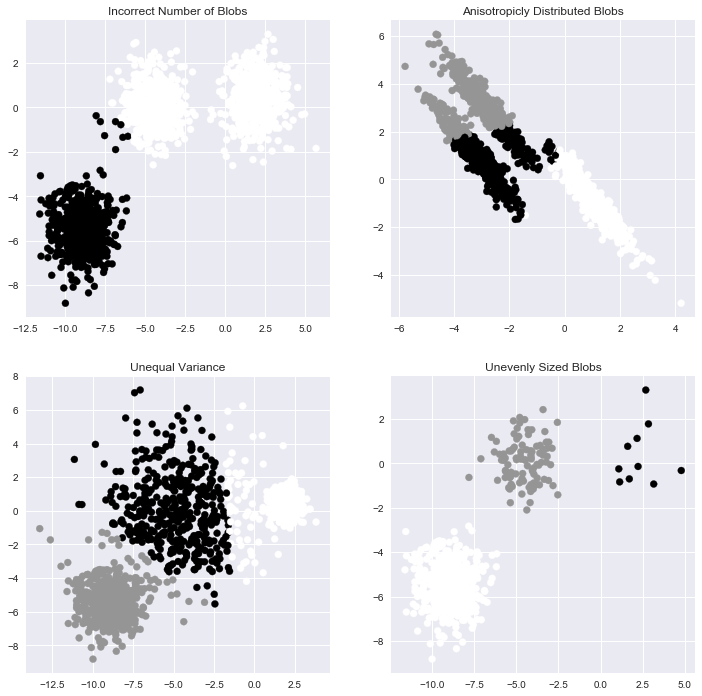

In [12]:
import gc
gc.collect()

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.figure(figsize=(12, 12))

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Incorrect number of clusters
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")

# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Anisotropicly Distributed Blobs")

# Different variance
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Unequal Variance")

# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3,
                random_state=random_state).fit_predict(X_filtered)

plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs")

plt.show()

In [13]:
vector_values, labels = [X_aniso, y_varied]
num_clusters = len(set(labels))

n_runs = 30
methods = [kfive_medoids, kfive, kfive_mass, kmass_5, kmeans, kmedoids]
method_names = ["kfive_medoids", "kfive", "kfive_mass", "kmass_5", "kmeans", "kmedoids"]
count_methods = 6

batch_evaluation(methods, method_names)

..............................
kfive_medoids
Results of 30 runs (mean,std_var,min,max):
	 Acc   : 	0.9777, 	0.0125, 	0.9653, 	0.9973
	 F1    : 	0.9777, 	0.0125, 	0.9653, 	0.9973
	 NMI   : 	0.9152, 	0.0414, 	0.8765, 	0.9859
	 Purity: 	0.9777, 	0.0125, 	0.9653, 	0.9973
	 RI    : 	0.9714, 	0.0158, 	0.9559, 	0.9965
	 ARI   : 	0.9357, 	0.0355, 	0.9008, 	0.9920
	 time  : 	17.9923, 	8.8962, 	3.8935, 	34.5438


kfive
Results of 30 runs (mean,std_var,min,max):
	 Acc   : 	0.8580, 	0.0659, 	0.7013, 	0.9273
	 F1    : 	0.8483, 	0.0860, 	0.6397, 	0.9270
	 NMI   : 	0.7074, 	0.0368, 	0.6467, 	0.7920
	 Purity: 	0.8935, 	0.0233, 	0.8487, 	0.9373
	 RI    : 	0.8579, 	0.0393, 	0.7720, 	0.9131
	 ARI   : 	0.6887, 	0.0719, 	0.5400, 	0.8048
	 time  : 	15.2825, 	8.6586, 	1.1093, 	30.4843


kfive_mass
Results of 30 runs (mean,std_var,min,max):
	 Acc   : 	0.9359, 	0.0694, 	0.5820, 	0.9927
	 F1    : 	0.9334, 	0.0817, 	0.5104, 	0.9926
	 NMI   : 	0.8301, 	0.0684, 	0.6287, 	0.9633
	 Purity: 	0.9468, 	0.0236, 	0.9007,

truth


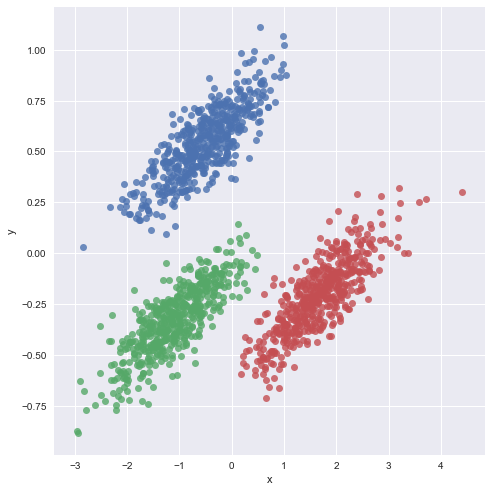

kmeans


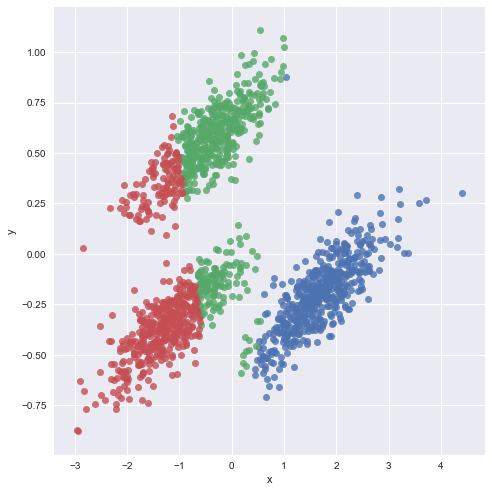

kmedoids


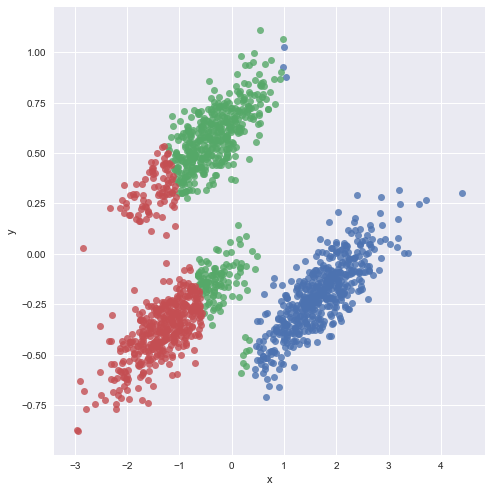

kfive


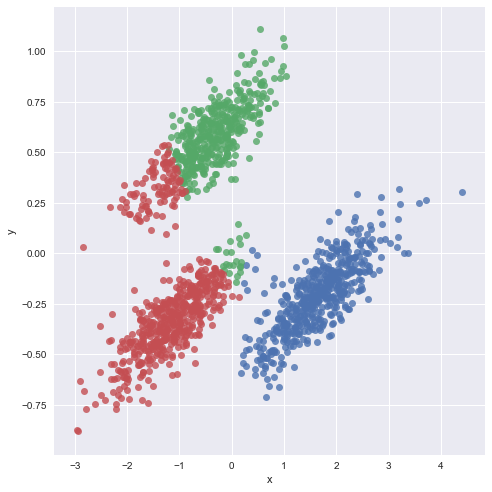

kfive_medoids


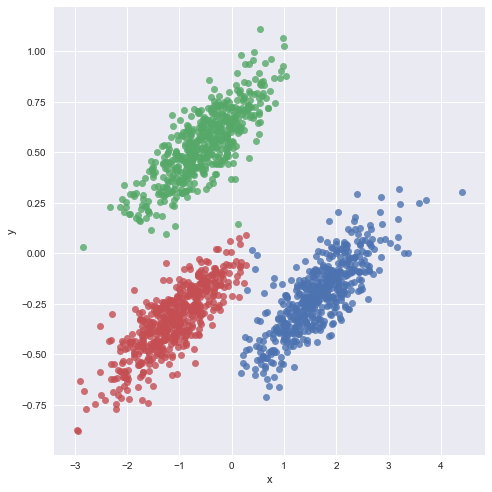

kfive_mass


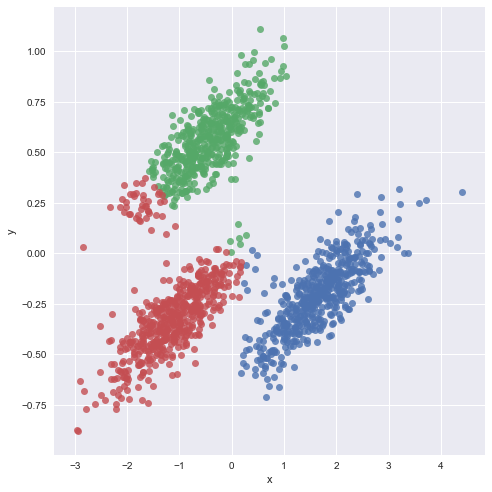

kmass_5


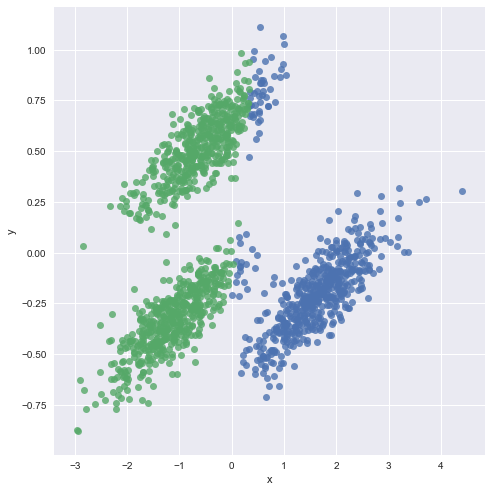

In [14]:
mlab_pca = mlabPCA(vector_values)
users_2d = mlab_pca.project(vector_values, minfrac=mlab_pca.fracs[1])

shared_init_assignment = initialize_clusters(vector_values, num_clusters)
_, projections = Projections(vector_values)


print("truth")
drawClusters(labels)

r = kmeans(vector_values, projections, shared_init_assignment)
print("kmeans")
drawClusters(r)
r = kmedoids(vector_values, projections, shared_init_assignment)
print("kmedoids")
drawClusters(r)
r = kfive(vector_values, projections, shared_init_assignment)
print("kfive")
drawClusters(r)
r = kfive_medoids(vector_values, projections, shared_init_assignment)
print("kfive_medoids")
drawClusters(r)
r = kfive_mass(vector_values, projections, shared_init_assignment)
print("kfive_mass")
drawClusters(r)
r = kmass_5(vector_values, projections, shared_init_assignment)
print("kmass_5")
drawClusters(r)

kmeans


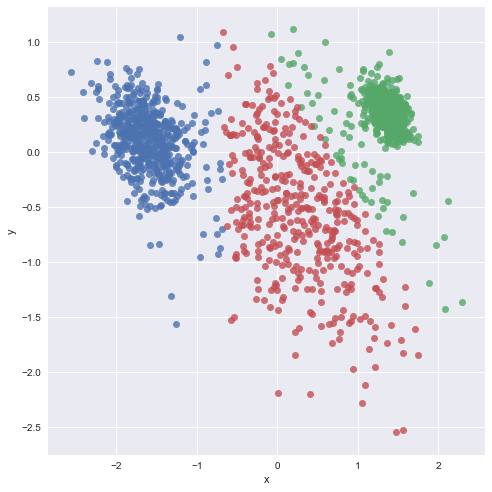

kmedoids


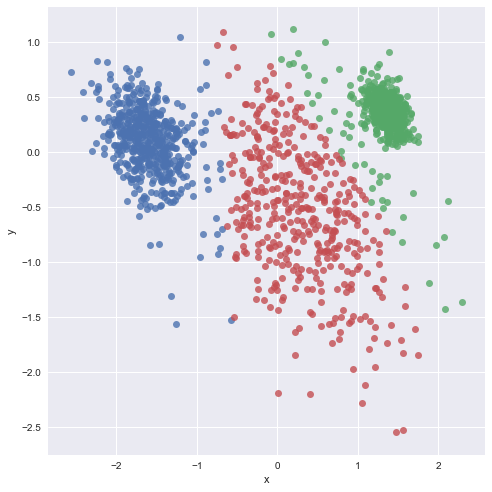

kfive


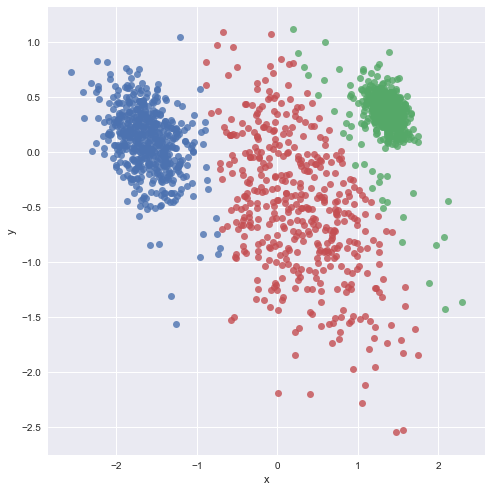

kfive_medoids


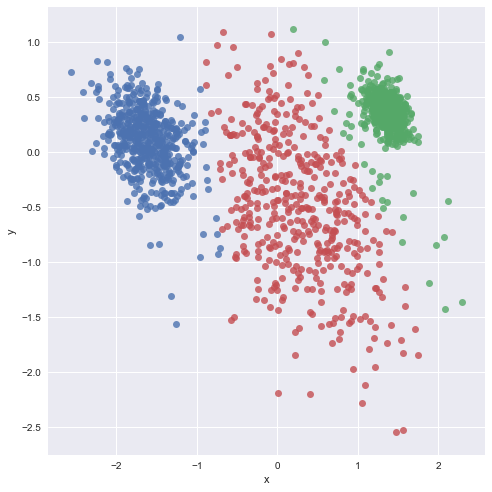

kfive_mass


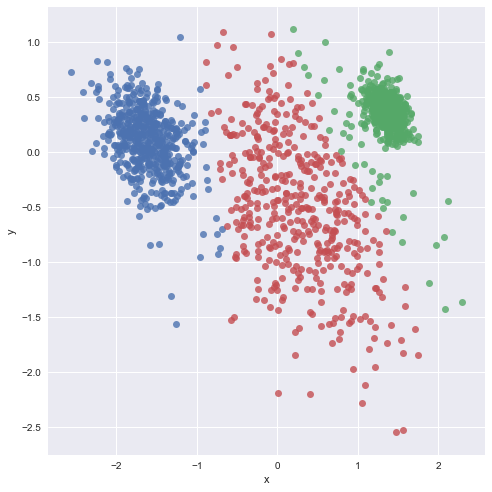

kmass_5


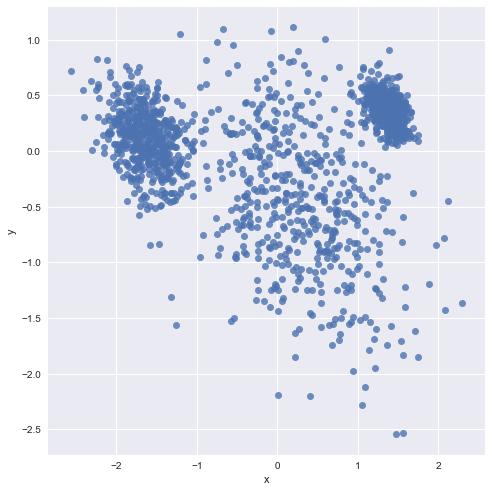

In [15]:
vector_values, labels = [X_varied, y_varied]
num_clusters = len(set(labels))

plt.clf()
plt.figure(figsize=(12, 12))

mlab_pca = mlabPCA(vector_values)
users_2d = mlab_pca.project(vector_values, minfrac=mlab_pca.fracs[1])

# batch_evaluation(methods, method_names)

shared_init_assignment = initialize_clusters(vector_values, num_clusters)
_, projections = Projections(vector_values)

r = kmeans(vector_values, projections, shared_init_assignment)
print("kmeans")
drawClusters(r)
r = kmedoids(vector_values, projections, shared_init_assignment)
print("kmedoids")
drawClusters(r)
r = kfive(vector_values, projections, shared_init_assignment)
print("kfive")
drawClusters(r)
r = kfive_medoids(vector_values, projections, shared_init_assignment)
print("kfive_medoids")
drawClusters(r)
r = kfive_mass(vector_values, projections, shared_init_assignment)
print("kfive_mass")
drawClusters(r)
r = kmass_5(vector_values, projections, shared_init_assignment)
print("kmass_5")
drawClusters(r)

kmeans


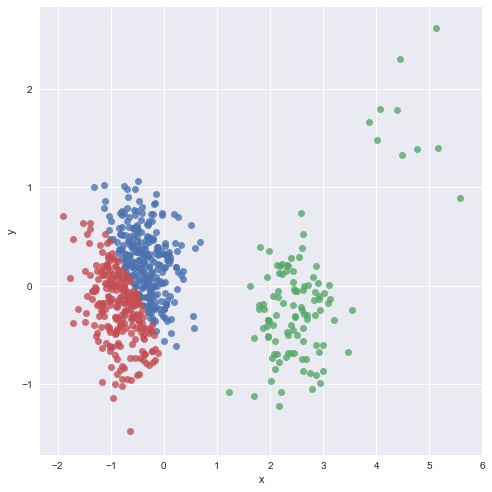

kmedoids


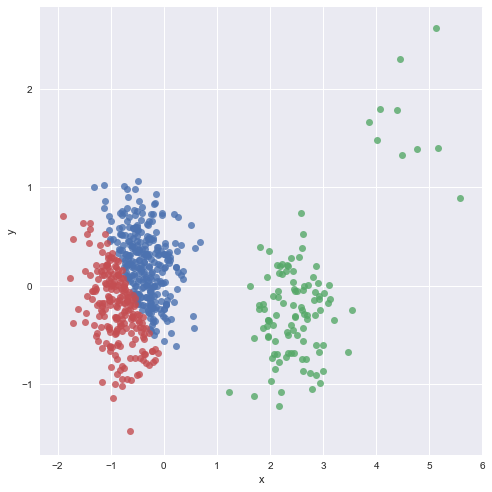

kfive


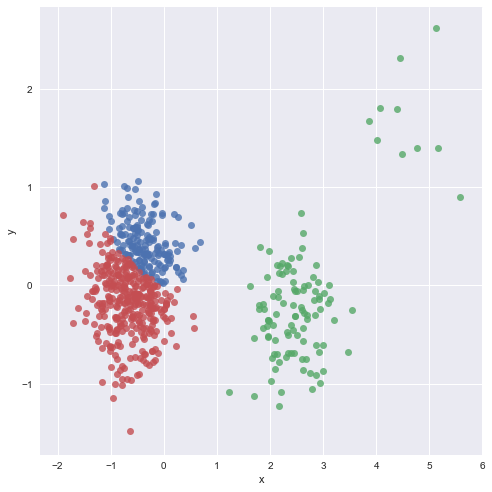

kfive_medoids


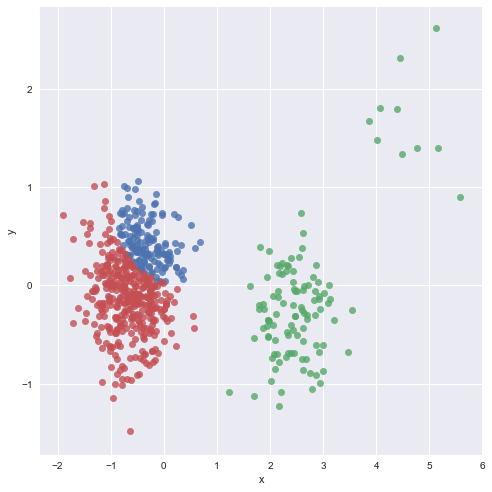

kfive_mass


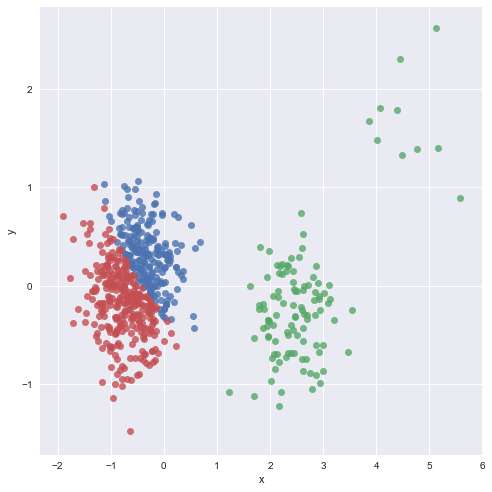

kmass_5


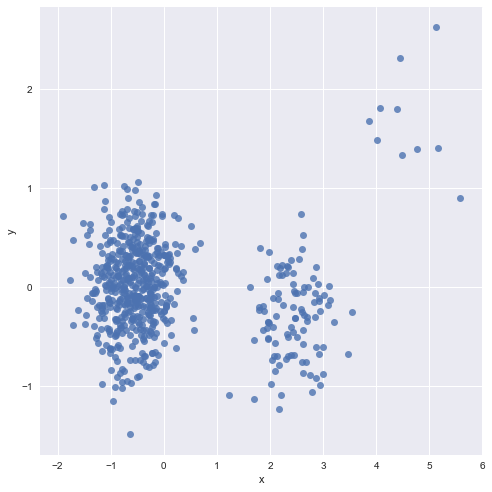

In [16]:
vector_values, labels = [X_filtered, y_varied]
num_clusters = len(set(labels))

plt.clf()
plt.figure(figsize=(12, 12))

mlab_pca = mlabPCA(vector_values)
users_2d = mlab_pca.project(vector_values, minfrac=mlab_pca.fracs[1])

# batch_evaluation(methods, method_names)

shared_init_assignment = initialize_clusters(vector_values, num_clusters)
_, projections = Projections(vector_values)

r = kmeans(vector_values, projections, shared_init_assignment)
print("kmeans")
drawClusters(r)
r = kmedoids(vector_values, projections, shared_init_assignment)
print("kmedoids")
drawClusters(r)
r = kfive(vector_values, projections, shared_init_assignment)
print("kfive")
drawClusters(r)
r = kfive_medoids(vector_values, projections, shared_init_assignment)
print("kfive_medoids")
drawClusters(r)
r = kfive_mass(vector_values, projections, shared_init_assignment)
print("kfive_mass")
drawClusters(r)
r = kmass_5(vector_values, projections, shared_init_assignment)
print("kmass_5")
drawClusters(r)